<b> Regression Models </b> in an object oriented way:
<br>
<hr>
Create a linear regression model based on the formula
$\hat{y}=b_0 + b_1 x$<br>
The data is collected and stored in a `design matrix` $X$ $\sim n \times 2$ (we have one feature and one constant, for n observations).
<br>
The data we need to predict : $Y\sim n \times 1$
<br>
The solution for b is :
<br>
$b=(X^T X)^{-1}X^T Y$
<br>
As you can see $b \sim 2 \times 1$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's create some basis example and generate 10 data-points $(x_i,y_i)$

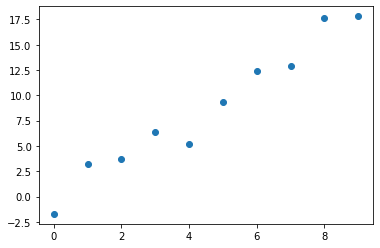

In [26]:
X = np.arange(0,10)
Y=(2*X+np.random.randn(1,len(X)))
plt.scatter(X,Y);

Lets create a simple function to make the regression. <br>
A function where the input is $X$ and $Y$ and the output is a vector $b$ with the intercept & coefficient

In [27]:
def linear_regression(X,Y):
    #add a column with ones
    X_ones = np.ones(X.shape)
    X = np.vstack([ X_ones,X]).T
    Y = Y.T
    b = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    return b.reshape(-1,)

In [28]:
b= linear_regression(X,Y)
print('b0:',b[0],' b1:',b[1])

b0: -0.6967624331879065  b1: 2.0869965286071417


To make predictions we can write another function

In [29]:
def predict(X,b):
    return X*b[1]+b[0]

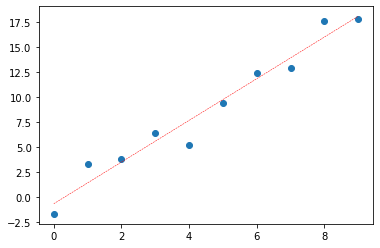

In [30]:
Y_predict = predict(X,b)
plt.scatter(X,Y);
plt.plot(X,Y_predict,'r--',linewidth=0.5);

This is a story that get very messy and we still have to add R-Square and/or other metrics.

Let's see what we can do using Object Oriented Programming

In [31]:
class myregression:
    def __init__(self):
        self.b_0=None
        self.b_1=None
    
    def __repr__(self):
        return 'my personal linear regression'
    
    def fit(self,X,Y):
        X_ones = np.ones(X.shape)
        X = np.vstack([ X_ones,X]).T
        Y = Y.T
        b = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
        b = b.reshape(-1,)
        self.b_0 = b[0]
        self.b_1 = b[1]
    
    def predict(self,X):
        return X*self.b_1+self.b_0

The key building blocks of the class `myregression` are:
1. initializer : `__init__()` function which is used to create an instance of a class
2. `__repr__()`: which adds an explanation on the class
3. The other member functions such as `fit()` or `predict()`

In [32]:
linreg = myregression()

In [33]:
print(linreg)

my personal linear regression


Step 1: Fit the model to the data

In [34]:
linreg.fit(X,Y)

Step 2 : Make predictions

In [35]:
linreg.predict(X)

array([-0.69676243,  1.3902341 ,  3.47723062,  5.56422715,  7.65122368,
        9.73822021, 11.82521674, 13.91221327, 15.9992098 , 18.08620632])